<a href="https://colab.research.google.com/github/MidhileshDusanapudi/Assignment4/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

1. Apply Linear Regression to the provided dataset using underlying steps.

a. Import the given “Salary_Data.csv”

b. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.

c. Train and predict the model.

d. Calculate the mean_squared error

e. Visualize both train and test data using scatter plot

In [213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
#Importing Salary_Data.csv
path = '/content/drive/MyDrive/Colab Notebooks/Salary_Data.csv'
datafrm=pd.read_csv(path)
datafrm.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [215]:
X = datafrm[["YearsExperience"]]
Y = datafrm[["Salary"]]
#Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset.
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.33)

In [216]:
regres = LinearRegression().fit(X_Train, Y_Train)
regres.score(X_Train,Y_Train)

0.9569921077930383

In [217]:
Y_Pred = regres.predict(X_Test)

In [218]:
#Calculating the mean_squared error
mean_squared_error(Y_Test,Y_Pred)

37767665.475036696

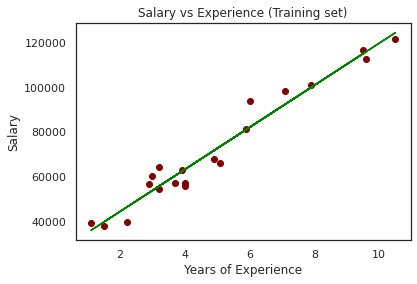

In [219]:
#Visualization for Training data
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(X_Train, Y_Train, color = "maroon")
plt.plot(X_Train, regres.predict(X_Train), color = "green")
plt.show()

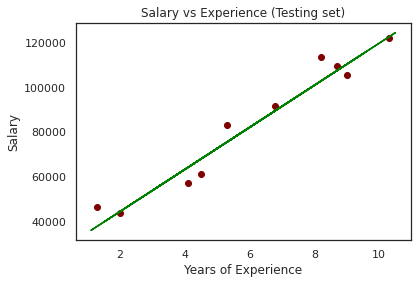

In [220]:
#Visualization for Testing data
plt.title("Salary vs Experience (Testing set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(X_Test, Y_Test, color = "maroon")
plt.plot(X_Train, regres.predict(X_Train), color = "green")
plt.show()

2. Apply K means clustering in the dataset provided:

• Remove any null values by the mean.

• Use the elbow method to find a good number of clusters with the K-Means algorithm

• Calculate the silhouette score for the above clustering

In [221]:
path1 ='/content/drive/MyDrive/Colab Notebooks/K-Mean_Dataset.csv'
datafrm1=pd.read_csv(path1)
datafrm1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [222]:
#Replacing empty values with mean
datafrm1.drop(['CUST_ID'],inplace=True,axis=1)
datafrm1['MINIMUM_PAYMENTS'].fillna(value=datafrm1['MINIMUM_PAYMENTS'].mean(),inplace=True)
datafrm1['CREDIT_LIMIT'].fillna(value=datafrm1['CREDIT_LIMIT'].mean(),inplace=True)

In [223]:
# K means with 3 clusters and feature scaling
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(datafrm1)
print(km)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(datafrm1)
score = metrics.silhouette_score(datafrm1, y_cluster_kmeans)
print(score)

KMeans(n_clusters=3)
0.46504469672047805


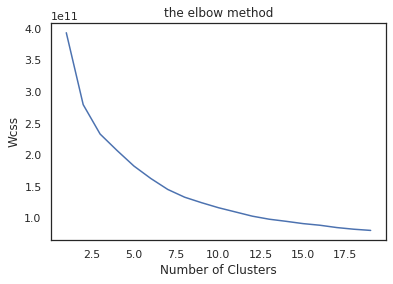

In [224]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(datafrm1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [225]:
kmeans = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(datafrm1)
y_cluster_kmeans = kmeans.predict(datafrm1)
#Calculating the Silhouette Score
silhouette_score = metrics.silhouette_score(datafrm1, y_cluster_kmeans)
print(silhouette_score)

0.3810874517610816


3. Try feature scaling and then apply K-Means on the scaled features. Did that improve the Silhouette score? If
Yes, can you justify why

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(datafrm1)

In [227]:
# K means with 3 clusters and feature scaling
nclusters = 3
km = KMeans(n_clusters=nclusters)
km.fit(df_scaled)
print(km)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(df_scaled)
from sklearn import metrics
score = metrics.silhouette_score(df_scaled, y_cluster_kmeans)
print(score)

KMeans(n_clusters=3)
0.2505299806322502


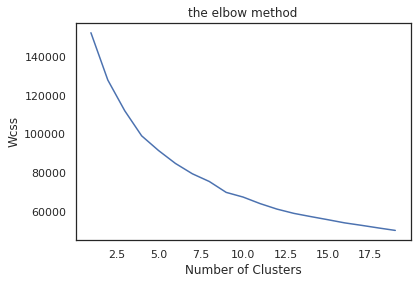

In [228]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

Elbow is at Number of Clusters at 8. So Numner of clusters is 8

In [229]:
kmeans = KMeans(n_clusters = 8, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(df_scaled)
#print(labels)
y_cluster_kmeans = kmeans.predict(df_scaled)
scaled_silhouette_score = metrics.silhouette_score(df_scaled, y_cluster_kmeans)

In [230]:
print(scaled_silhouette_score)

0.20854008021562268


**The Silhouette Score hasn't improved after feature scaling using KMeans **